Week 3, Assignment C1:

OLS Linear Regression in Python

In this notebook, we will perform an OLS linear regression in Python.
Please complete the lines bellow where you see "# TODO".

In [1]:
#Objective 1.
#Use this cell to import all three of the Pandas (as pd), Numpy (as np), and Pyplot (from Matplotlib as plt) 
#packages.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
np.random.seed(0)
x = 3.0 * np.random.randn(100) + 2.0
res = 0.5 * np.random.randn(100)
y = 1.5 + 0.45 * x + res

#Objective 2.
#Create a Pandas DataFrame to store the values of x and y generated by the commands appearing above, and examine
#the first five rows of the DataFrame.

df = pd.DataFrame({'x':pd.Series([7.292157,3.200472,4.936214,8.722680,7.602674 ]),
                   'y':pd.Series([5.723046,2.266333,3.086054,5.909904,4.334642],
                                index=list(range(5)))})  
print(df)

          x         y
0  7.292157  5.723046
1  3.200472  2.266333
2  4.936214  3.086054
3  8.722680  5.909904
4  7.602674  4.334642


In [3]:
#Objective 3.
#Calculate the means of both x and y, and print them as output.
x_bar = np.mean(df['x'])
y_bar = np.mean(df['y'])
print(x_bar)
print(y_bar)

6.3508394
4.2639958


In [4]:
#Objective 4.
#Add a column called 'x_var' to the DataFrame.  Populate this column with the squares of the deviations of the
#x values from their mean (x_bar).
df['x_var'] = (df['x'] - x_bar)**2
print(df)

          x         y     x_var
0  7.292157  5.723046  0.886079
1  3.200472  2.266333  9.924815
2  4.936214  3.086054  2.001165
3  8.722680  5.909904  5.625628
4  7.602674  4.334642  1.567090


In [5]:
#Objective 5.
#Add a column called 'xy_cov' to the DataFrame.  Populate this column with the products of the deviations of the
#x values from their mean (x_bar) and the deviations of the y values from their mean (y_bar):
#(x - x_bar)(y - y_bar).
df['xy_cov'] = (df['x'] - x_bar) * (df['y'] - y_bar)
print(df)

          x         y     x_var    xy_cov
0  7.292157  5.723046  0.886079  1.373430
1  3.200472  2.266333  9.924815  6.293372
2  4.936214  3.086054  2.001165  1.666346
3  8.722680  5.909904  5.625628  3.903832
4  7.602674  4.334642  1.567090  0.088437


In [6]:
#Objective 6.
#Use the values currently stored in the DataFrame to calculate the OLS Linear Regression coefficients
# We want to take the sum of our collumn 'xy_cov' and divide it by the sum of 'x_var'
#alpha and beta, and print them as output.

beta = df['xy_cov'].sum() / df['x_var'].sum()
alpha = y_bar - beta * x_bar
print(alpha)
print(beta)

0.0336268992745925
0.6661117742522992


In [20]:
#Objective 7.
#Make a new vector of values called y_pred containing a predicted y value for each actual y value in the DataFrame.
# y_pred = a + BX

y_pred = alpha + beta*df['x'] 
print(y_pred)
df['y_pred']=y_pred
print(df)

0    4.891019
1    2.165499
2    3.321697
3    5.843907
4    5.097858
Name: x, dtype: float64
          x         y     x_var    xy_cov  4.891018536670916  \
0  7.292157  5.723046  0.886079  1.373430           4.891019   
1  3.200472  2.266333  9.924815  6.293372           4.891019   
2  4.936214  3.086054  2.001165  1.666346           4.891019   
3  8.722680  5.909904  5.625628  3.903832           4.891019   
4  7.602674  4.334642  1.567090  0.088437           4.891019   

   2.165498981639397  3.321697164903631  5.843906750309638  5.097857566476417  \
0           2.165499           3.321697           5.843907           5.097858   
1           2.165499           3.321697           5.843907           5.097858   
2           2.165499           3.321697           5.843907           5.097858   
3           2.165499           3.321697           5.843907           5.097858   
4           2.165499           3.321697           5.843907           5.097858   

     y_pred  
0  4.891019  
1  2.1

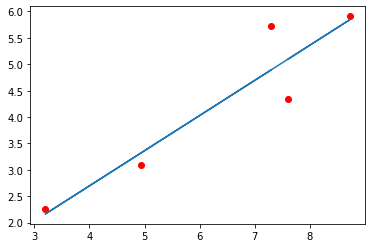

In [21]:
#Objective 8.
#Plot the predicted values of y (y_pred) against the actual values of y.  Make the actual values of y red in color.
plt.scatter(df['x'], df['y'], color='r')
plt.plot(df['x'], df['y_pred'])
plt.show()